Goal:

Evaluate A/B testing results and decide which ad works the best.

Data Description:

* auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.
* experiment: which group the user belongs to - control or exposed.
    * control: users who have been shown a dummy ad
    * exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.
* date: the date in YYYY-MM-DD format
* hour: the hour of the day in HH format.
* device_make: the name of the type of device the user has e.g. Samsung
* platform_os: the id of the OS the user has.
* browser: the name of the browser the user uses to see the BIO questionnaire.
* yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.
* no: 1 if the user chooses the “No” radio button for the BIO questionnaire.

In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# import custom module
import sys
sys.path.append('../Modules')
import statistical_tests as st

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../Data/AdSmartABdata - AdSmartABdata.csv")
display(df.head())
display(df.info())
display(df.describe())
print(df.shape)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


None

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


(8077, 9)


device_make
OnePlus ONEPLUS A3003       6
Samsung SM-A920F            6
Samsung SM-A500FU           7
ELE-L29                     8
Samsung SM-N970F            8
                         ... 
Samsung SM-G950F          148
Samsung SM-G973F          154
Samsung SM-G960F          203
iPhone                    433
Generic Smartphone       4743
Length: 80, dtype: int64

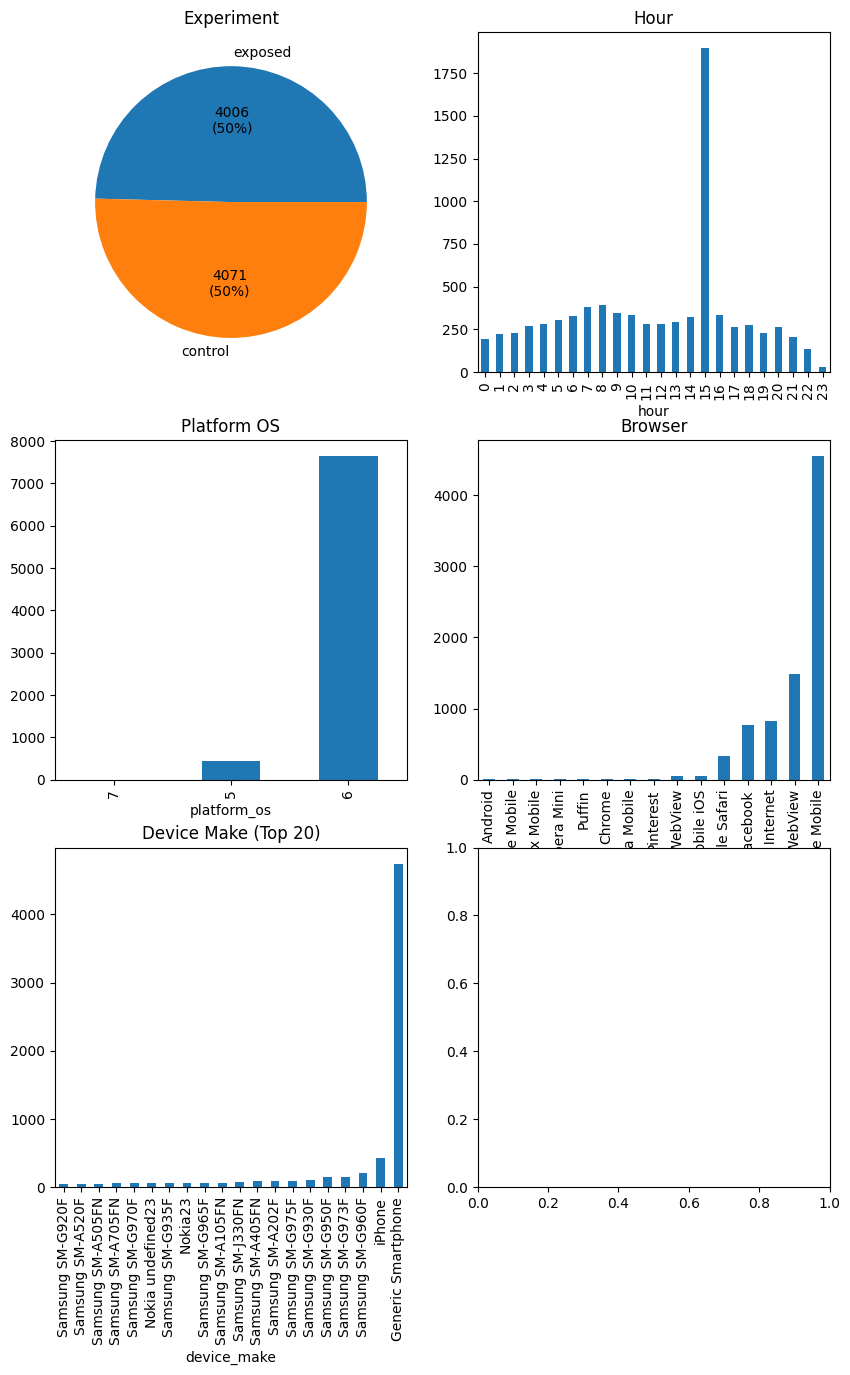

In [32]:
fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 15))

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n({val:.0f}%)'

df.groupby('experiment').size().sort_values().plot(kind='pie', autopct=label_function, ax=ax11, title="Experiment")
df.groupby('hour').size().plot(kind='bar', ax=ax12, title="Hour")
df.groupby('platform_os').size().sort_values().plot(kind='bar', ax=ax21, title="Platform OS")
df.groupby('browser').size().sort_values().plot(kind='bar', ax=ax22, title="Browser")
device_make_group = df.groupby('device_make').size().sort_values()
device_make_group[len(device_make_group)-20:].plot(kind='bar', ax=ax31, title="Device Make (Top 20)")

plt.show()

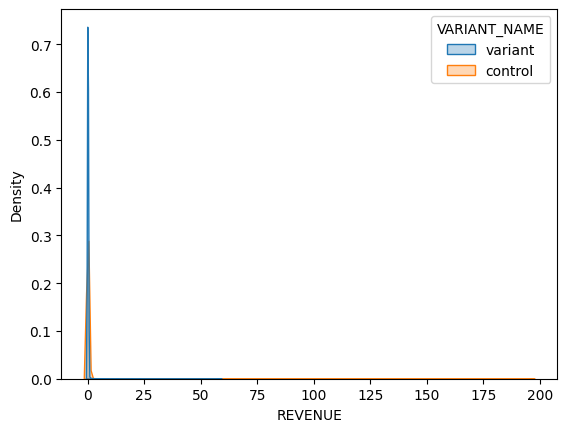

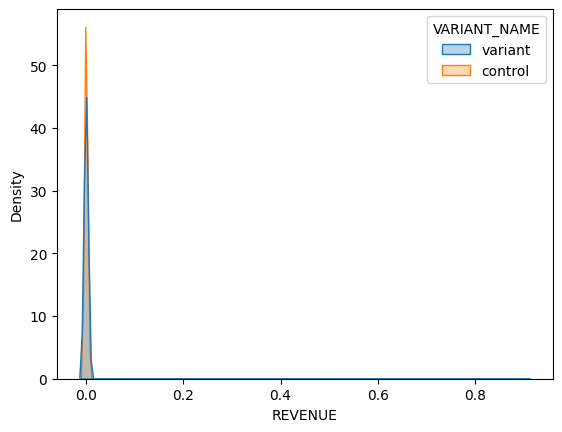

In [ ]:
sns.kdeplot(data=df, x="experiment", hue="VARIANT_NAME", fill=True, alpha=0.3)
plt.show()

sns.kdeplot(data=df[df["experiment"]<1], x="experiment", hue="VARIANT_NAME", fill=True, alpha=0.3)
plt.show()